# Challenge: Alura Store

Los datos recopilados se obtienen en el repositorio de Github:
*https://github.com/alura-es-cursos/challenge1-data-science-latam*

Importación de los datos.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
tiendas = {'tienda': tienda,
           'tienda2': tienda2,
           'tienda3': tienda3,
           'tienda4': tienda4
           }

for nombre, tienda in tiendas.items():
    print(f"Nombre de la tienda: {nombre}")
    print(f"Tienda: {tienda}\n")
    print(f"Información de columnas: {tienda.columns}")


Nombre de la tienda: tienda
Tienda:                Producto Categoría del Producto     Precio  Costo de envío  \
0     Asistente virtual           Electrónicos   164300.0          6900.0   
1       Mesa de comedor                Muebles   192300.0          8400.0   
2         Juego de mesa               Juguetes   209600.0         15900.0   
3            Microondas      Electrodomésticos   757500.0         41000.0   
4      Silla de oficina                Muebles   335200.0         20200.0   
...                 ...                    ...        ...             ...   
2354          Iphone 15           Electrónicos  1284400.0         66600.0   
2355          Impresora           Electrónicos   282800.0         15300.0   
2356      Juego de mesa               Juguetes   122900.0          7200.0   
2357           Cama box                Muebles   691300.0         35000.0   
2358         Smartwatch           Electrónicos   195000.0          8600.0   

     Fecha de Compra         Vendedor L

In [3]:
# Visualización de datos
import matplotlib.pyplot as plt


### 1. Análisis de facturación.

In [4]:
def calcular_precio(tienda):
    return tienda['Precio'].sum()

for nombre, tienda in tiendas.items():
    precio = calcular_precio(tienda)
    print(f"El total de precio de la {nombre} es de {precio}")

El total de precio de la tienda es de 1150880400.0
El total de precio de la tienda2 es de 1116343500.0
El total de precio de la tienda3 es de 1098019600.0
El total de precio de la tienda4 es de 1038375700.0


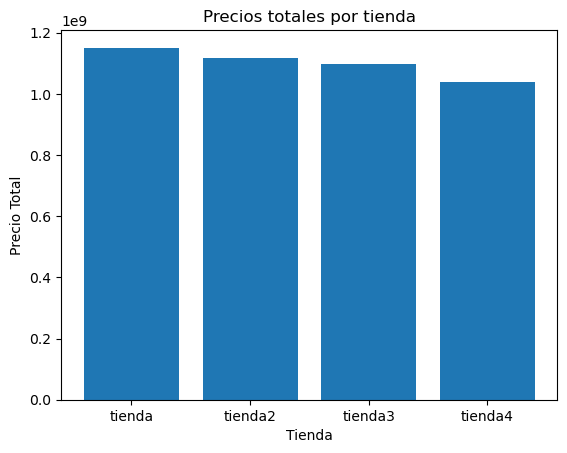

In [5]:
# Visualización de precios por tienda

def visualizar_precios(tiendas):
    totales = {}
    for nombre, tienda in tiendas.items():
        totales[nombre] = calcular_precio(tienda)
    
    plt.bar(totales.keys(), totales.values())
    plt.xlabel('Tienda')
    plt.ylabel('Precio Total')
    plt.title('Precios totales por tienda')
    plt.show()

visualizar_precios(tiendas)

### 2. Ventas por categoría.

In [6]:
def productos_vendidos_por_categoria(tienda):
    categorias = tienda.groupby('Categoría del Producto').size().reset_index(name = 'Cantidad').sort_values(by='Cantidad', ascending=False)
    return categorias

for nombre, tienda in tiendas.items():
    categorias = productos_vendidos_por_categoria(tienda)
    print(f"{nombre}: {categorias}")

tienda:     Categoría del Producto  Cantidad
7                  Muebles       465
3             Electrónicos       448
5                 Juguetes       324
2        Electrodomésticos       312
1     Deportes y diversión       284
4   Instrumentos musicales       182
6                   Libros       173
0  Artículos para el hogar       171
tienda2:     Categoría del Producto  Cantidad
7                  Muebles       442
3             Electrónicos       422
5                 Juguetes       313
2        Electrodomésticos       305
1     Deportes y diversión       275
4   Instrumentos musicales       224
6                   Libros       197
0  Artículos para el hogar       181
tienda3:     Categoría del Producto  Cantidad
7                  Muebles       499
3             Electrónicos       451
5                 Juguetes       315
2        Electrodomésticos       278
1     Deportes y diversión       277
6                   Libros       185
0  Artículos para el hogar       177
4   Instrume

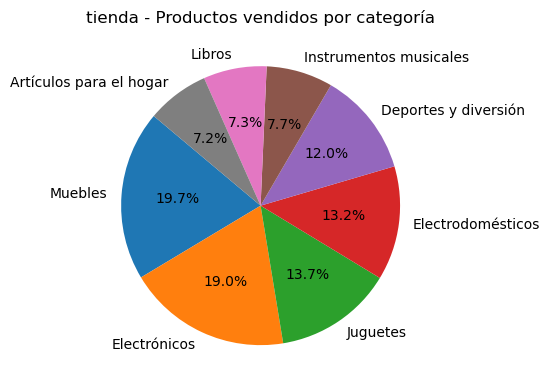

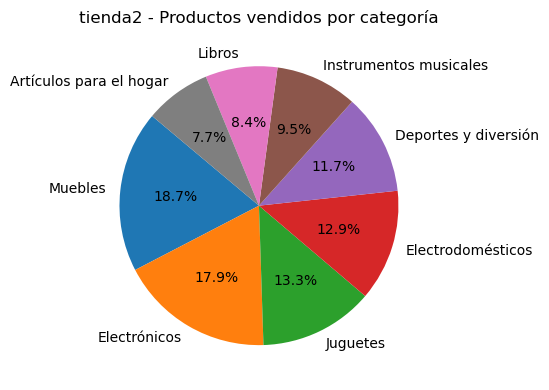

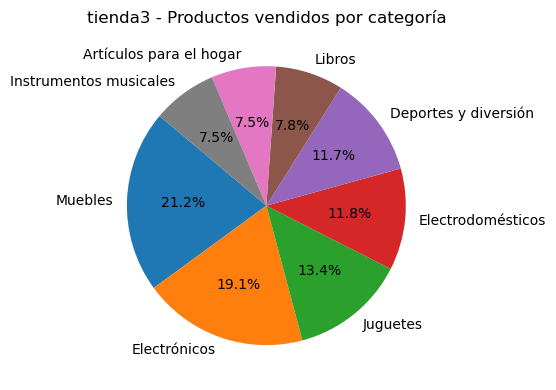

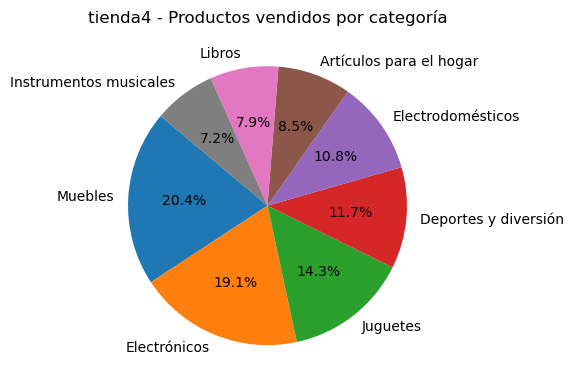

In [7]:
# Visualización de datos
def visualizar_categorias_mas_populares(tiendas):
    categorias_totales = {}
    for nombre, tienda in tiendas.items():
        categorias_totales[nombre] = productos_vendidos_por_categoria(tienda)
    
    for nombre, categorias in categorias_totales.items():
        plt.figure(figsize=(8, 4))
        plt.pie(categorias['Cantidad'], labels=categorias['Categoría del Producto'], autopct='%1.1f%%', startangle=140)
        plt.title(f'{nombre} - Productos vendidos por categoría')
        plt.tight_layout()
        plt.show()

visualizar_categorias_mas_populares(tiendas)

### 3. Calificación promedio de la tienda

In [8]:
def calificaciones_promedio(tiendas):
    calificaciones = {}
    for nombre, tienda in tiendas.items():
        calificaciones[nombre] = sum(tienda['Calificación']) / len(tienda)
        calificaciones[nombre] = round(calificaciones[nombre], 2)
    return calificaciones

for nombre, tienda in tiendas.items():
    satisfaccion = calificaciones_promedio(tiendas)
    print(f"El promedio de calificaciones de la {nombre} es de {satisfaccion[nombre]}")

El promedio de calificaciones de la tienda es de 3.98
El promedio de calificaciones de la tienda2 es de 4.04
El promedio de calificaciones de la tienda3 es de 4.05
El promedio de calificaciones de la tienda4 es de 4.0


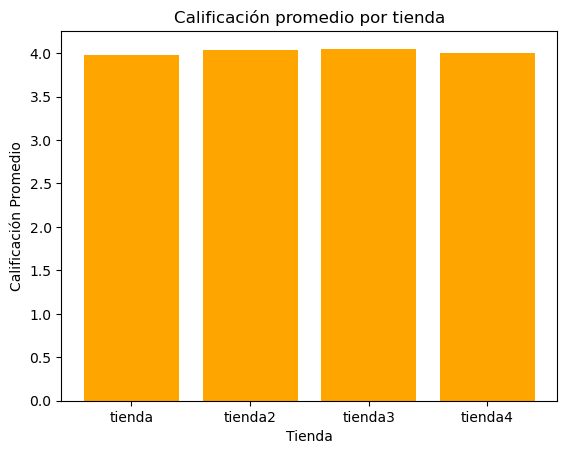

In [9]:
# Visualización de datos

def visualizar_satisfaccion(tiendas):
    calificaciones = calificaciones_promedio(tiendas)
    plt.bar(calificaciones.keys(), calificaciones.values(), color='orange')
    plt.xlabel('Tienda')
    plt.ylabel('Calificación Promedio')
    plt.title('Calificación promedio por tienda')
    plt.show()

visualizar_satisfaccion(tiendas)

### 4. Productos más y menos vendidos

In [10]:
def productos_mas_y_menos_vendidos(tienda):
    productos = tienda.groupby('Producto').size().reset_index(name = 'Cantidad').sort_values(by='Cantidad', ascending=False)
    mas_vendido = productos.iloc[0]
    menos_vendido = productos.iloc[-1]
    return mas_vendido, menos_vendido

for nombre, tienda in tiendas.items():
    mas_vendido, menos_vendido = productos_mas_y_menos_vendidos(tienda)
    print(f"En la {nombre} el producto más vendido es {mas_vendido['Producto']} con {mas_vendido['Cantidad']} ventas")
    print(f"En la {nombre} el producto menos vendido es {menos_vendido['Producto']} con {menos_vendido['Cantidad']} ventas\n")

En la tienda el producto más vendido es TV LED UHD 4K con 60 ventas
En la tienda el producto menos vendido es Celular ABXY con 33 ventas

En la tienda2 el producto más vendido es Iniciando en programación con 65 ventas
En la tienda2 el producto menos vendido es Juego de mesa con 32 ventas

En la tienda3 el producto más vendido es Kit de bancas con 57 ventas
En la tienda3 el producto menos vendido es Bloques de construcción con 35 ventas

En la tienda4 el producto más vendido es Cama box con 62 ventas
En la tienda4 el producto menos vendido es Guitarra eléctrica con 33 ventas



### 5. Envío promedio por tienda

In [11]:
def costo_promedio_envio(tiendas):
    costos_promedios = {}
    for nombre, tienda in tiendas.items():
        costos_promedios[nombre] = tienda['Costo de envío'].mean()
        costos_promedios[nombre] = round(costos_promedios[nombre], 2)
    return costos_promedios

for nombre, tienda in tiendas.items():
    promedio_envios = costo_promedio_envio(tiendas)
    print(f'{nombre}: {promedio_envios[nombre]}')

tienda: 26018.61
tienda2: 25216.24
tienda3: 24805.68
tienda4: 23459.46


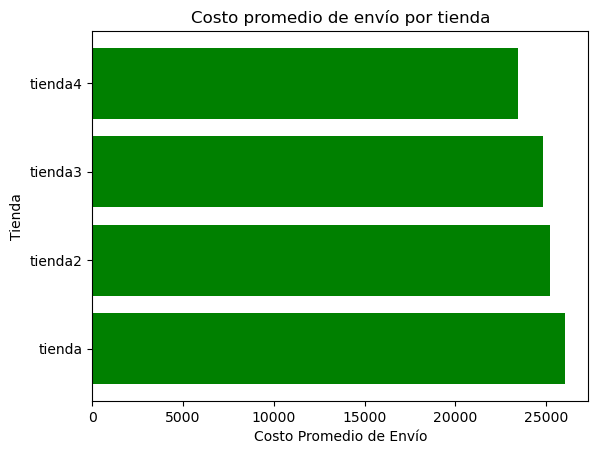

In [12]:
# Visualizar datos

def visualizar_promedio_envios(tiendas):
    costos_promedios = costo_promedio_envio(tiendas)
    plt.barh(costos_promedios.keys(), costos_promedios.values(), color='green')
    plt.xlabel('Costo Promedio de Envío')
    plt.ylabel('Tienda')
    plt.title('Costo promedio de envío por tienda')
    plt.show()

visualizar_promedio_envios(tiendas)

### Informe final

El Sr. Juan desea decidir a qué tienda distribuir sus productos. Se analizaron los datos de las cuatro sucursales ( tienda, tienda2, tienda3, tienda4 ) considerando: ingresos, mezcla de categorías, calificaciones de los clientes, productos más/menos vendidos y coste logístico medio. Se presentan a continuación los hallazgos y una recomendación clara y justificada.

* Ingresos Totales

Como podemos observar en los resultados, así como en la tabla de ingresos, tenemos lo siguiente:

| Tienda  |    Ingresos totales    |
| ------- | ---------------------- |
| tienda  | **1 150 880 400**      |
| tienda2 | 1 116 343 500          |
| tienda3 | 1 098 019 600          |
| tienda4 | 1 038 375 700          |

Como observamos, la tienda con mayor cantidad de ingresos es la tienda **tienda**, con un total de ingresos de **1 150 880 400**.

* Ventas por Categoría

Como se observa en las gráficas de pastel de cada tienda, los productos más vendidos son:
- Muebles
- Electrónicos
- Juguetes

* Satisfacción del cliente

En este caso, tenemos el promedio de valoración de cada tienda respecto a los clientes, así como se muestrá en el gráfico de barras anteriormente.

| Tienda  |  Promedio |
| ------- | ---------- |
| tienda3 | **4.05**   |
| tienda2 | 4.04       |
| tienda4 | 4.00       |
| tienda  | 3.98       |

Observamos que la tienda tienda3 tiene el promedio de valoración más alto, pero tienda tiene el promedio de valoración más bajo.

* Envíos promedio por tienda

En este caso, cómo se observa en la gráfica y en los valores obtenidos, obtenemos el siguiente análisis:

| Tienda  |    Costo medio envío    |
| ------- | ----------------------- |
| tienda4 | **23 459**              |
| tienda3 | 24 806                  |
| tienda2 | 25 216                  |
| tienda  | 26 019                  |

Observamos que la tienda4 es la más eficiente logísticamente.


Por lo que podemos decir que:
| Criterio clave        | Peso estratégico               | Mejor tienda |
| --------------------- | ------------------------------ | ------------ |
| Ingresos              | Alto – garantiza liquidez      | **tienda**   |
| Calificación (marca)  | Alto – reputación / recompra   | **tienda3**  |
| Coste logístico       | Medio – impacto en margen neto | **tienda4**  |
| Balance de categorías | Medio – reduce riesgo          | empate       |



### Conclusión

Considerando los criterios clave:

* Ingresos: La tienda con los menores ingresos totales es la tienda4 con $1,038,375,700. Menores ingresos podrían interpretarse como una menor eficiencia en la generación de ventas.

* Calificación (marca): La tienda con la calificación promedio más baja por parte de los clientes es la tienda con 3.98. Una baja satisfacción del cliente podría ser un indicativo de ineficiencia en la experiencia de compra o la calidad del servicio.

* Coste logístico: La tienda con el coste medio de envío más alto es la tienda con $26,019. Un coste logístico elevado puede ser un signo de ineficiencia en la gestión de envíos.

* Balance de categorías: En este criterio hubo un empate, por lo que no nos ayuda a discriminar una tienda como la menos eficiente en este aspecto.

Basándonos en los datos proporcionados, la **tienda** parece ser la candidata más fuerte para ser considerada la menos eficiente, ya que presenta los ingresos más altos (lo cual no es el objetivo en este caso), pero también la calificación promedio más baja de los clientes y el coste logístico más alto.

## Actividad Opcional


* Desafío:

Utilice los datos de latitud (lat) y longitud (lon) para mapear las ventas de cada tienda y analizar la distribución geográfica de los productos vendidos.

Genere gráficos de dispersión o mapas de calor (Heatmaps) para visualizar datos e identificar áreas con la mayor concentración de ventas.

Explore si algunas tiendas tienen un rendimiento superior o inferior al esperado en determinadas regiones e identifique si existen patrones geográficos que puedan influir en el rendimiento de las tiendas.

* Sugerencias:

Puede utilizar la biblioteca Matplotlib para gráficos de dispersión o incluso integrarla con otras bibliotecas como Folium para generar mapas interactivos si desea ir más allá.

Analice cómo las variables geográficas influyen en los ingresos y las calificaciones de las tiendas.

In [13]:
# Verificar el tipo de dato de latitud y longitud
for nombre, tienda in tiendas.items():
    print(nombre, tienda['lat'].apply(type), tienda['lon'].apply(type))

tienda 0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3       <class 'float'>
4       <class 'float'>
             ...       
2354    <class 'float'>
2355    <class 'float'>
2356    <class 'float'>
2357    <class 'float'>
2358    <class 'float'>
Name: lat, Length: 2359, dtype: object 0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3       <class 'float'>
4       <class 'float'>
             ...       
2354    <class 'float'>
2355    <class 'float'>
2356    <class 'float'>
2357    <class 'float'>
2358    <class 'float'>
Name: lon, Length: 2359, dtype: object
tienda2 0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3       <class 'float'>
4       <class 'float'>
             ...       
2354    <class 'float'>
2355    <class 'float'>
2356    <class 'float'>
2357    <class 'float'>
2358    <class 'float'>
Name: lat, Length: 2359, dtype: object 0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3   

In [14]:
# Verificar si hay latitudes o longitudes nulas
for nombre, tienda in tiendas.items():
    latitudes_nulas = tienda['lat'].isnull().sum()
    longitudes_nulas = tienda['lon'].isnull().sum()
    print(f"En la {nombre} hay {latitudes_nulas} latitudes nulas y {longitudes_nulas} longitudes nulas")

En la tienda hay 0 latitudes nulas y 0 longitudes nulas
En la tienda2 hay 0 latitudes nulas y 0 longitudes nulas
En la tienda3 hay 0 latitudes nulas y 0 longitudes nulas
En la tienda4 hay 0 latitudes nulas y 0 longitudes nulas


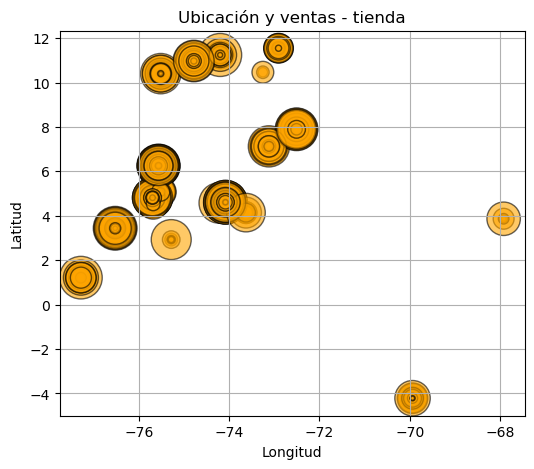

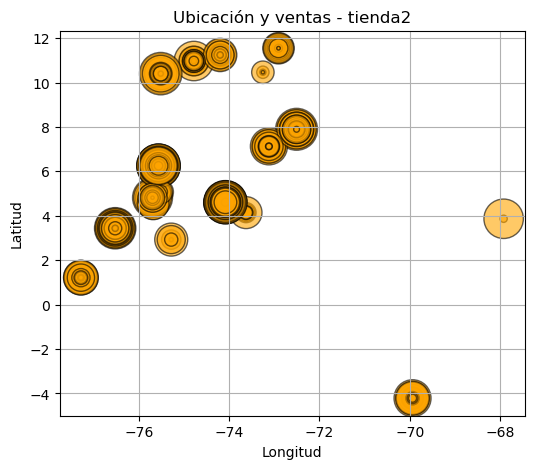

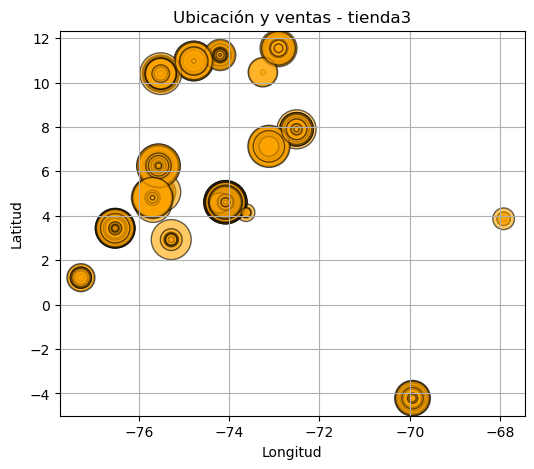

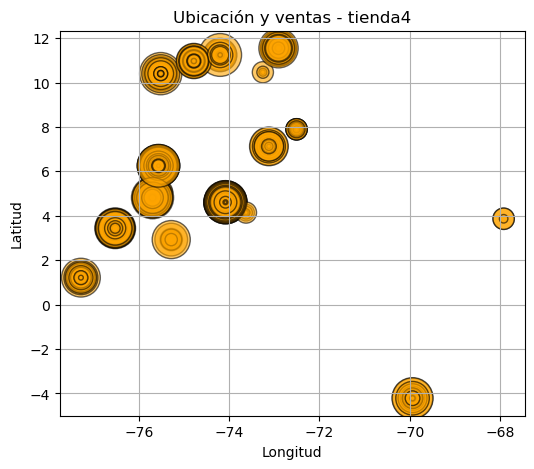

In [16]:
# Visualizar coordenadas geográficas de los productos vendidos de cada tienda

def visualizar_coordenadas(tiendas):
    for nombre, tienda in tiendas.items():
        plt.figure(figsize=(6, 5))
        plt.scatter(
            tienda['lon'], tienda['lat'],
            s=tienda['Precio'] / 3000,  # divide para que los círculos no sean enormes
            c='orange', alpha=0.6, edgecolors='black'
        )
        plt.title(f'Ubicación y ventas - {nombre}')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()

visualizar_coordenadas(tiendas)

In [ ]:
from folium import Map
from folium.plugins import HeatMap
from IPython.display import display

def mostrar_heatmaps(tiendas, modo='separado'):
    """
    Muestra mapas de calor directamente en el notebook.

    Parámetros:
    - tiendas: diccionario con nombre de tienda como clave y DataFrame como valor.
    - modo: 'separado' para un mapa por tienda, 'combinado' para todas en un solo mapa.
    """

    if modo == 'separado':
        for nombre, tienda in tiendas.items():
            # Calcular el centro del mapa como la media de las coordenadas
            lat_media = tienda['lat'].mean()
            lon_media = tienda['lon'].mean()

            # Crear el mapa centrado en la media de las coordenadas
            mapa = Map(location=[lat_media, lon_media], zoom_start=12)
            
            # Crear el mapa de calor con los datos de la tienda
            heat_data = [[row['lat'], row['lon'], row['Precio']] for _, row in tienda.iterrows()]
            HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(mapa)

            print(f"Mapa de calor: {nombre}")
            display(mapa)
    
    elif modo == 'combinado':
        # Calcular centro general
        lat_total = sum([df['lat'].mean() for df in tiendas.values()]) / len(tiendas)
        lon_total = sum([df['lon'].mean() for df in tiendas.values()]) / len(tiendas)
        mapa = Map(location=[lat_total, lon_total], zoom_start=12)

        # Agregar datos de todas las tiendas al mismo mapa
        for tienda in tiendas.values():
            heat_data = [[row['lat'], row['lon'], row['Precio']] for _, row in tienda.iterrows()]
            HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(mapa)

        print("Mapa de calor combinado de todas las tiendas")
        display(mapa)
    
    else:
        print("Modo inválido. Usa 'separado' o 'combinado'.")


In [20]:
# Mostrar mapas individuales
mostrar_heatmaps(tiendas, modo='separado')

Mapa de calor: tienda


Mapa de calor: tienda2


Mapa de calor: tienda3


Mapa de calor: tienda4


In [21]:
# Mostrar mapa combinado
mostrar_heatmaps(tiendas, modo='combinado')


Mapa de calor combinado de todas las tiendas


Observando el mapa de calor, así como el gráfico de dispersión, podemos observar que Bogotá tiene claramente el rendimiento más alto, seguida por otras ciudades grandes como Medellín, Cali, Cartagena, Barranquilla, entre otras, las cuales cada tienda tiende a realizar ventas en estas ciudades, en este caso, son ciudades rurales, por lo cual se observa un patrón de ventas, donde las tiendas venden en las mismas ciudades, sin embargo, observamos que cada tienda vende más o menos en cada una de las ciudades.